In [14]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [6]:
df = pd.read_csv('Review.csv')

In [7]:
df.head()

,sentiment,review
0,Negative,I had no background knowledge of this movie be...
1,Negative,I am a huge Jane Austen fan and I ordered the ...
2,Negative,Nothing to say but Wow! Has anyone actually ha...
3,Negative,i like Jane Austin novels. I love Pride and Pr...
4,Negative,In this day and age of incredible special movi...


In [8]:
category = pd.get_dummies(df.sentiment)
df_baru = pd.concat([df, category], axis=1)
df_baru = df_baru.drop(columns='sentiment')
df_baru.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   review    10000 non-null  object
 1   Negative  10000 non-null  uint8 
 2   Positive  10000 non-null  uint8 
dtypes: object(1), uint8(2)
memory usage: 97.8+ KB


In [9]:
review = df_baru['review'].values
y = df_baru[['Negative','Positive']].values
review_train , review_test, y_train, y_test = train_test_split(review, y, test_size=0.2)

In [10]:
#mengubah tipe data kata menjadi numerik
tokenizer = Tokenizer(num_words=5600, oov_token='x')
tokenizer.fit_on_texts(review_train)
tokenizer.fit_on_texts(review_test)

sekuens_train = tokenizer.texts_to_sequences(review_train)
sekuens_test = tokenizer.texts_to_sequences(review_test)

padded_train = pad_sequences(sekuens_train)
padded_test = pad_sequences(sekuens_test)

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5600, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.8),
    tf.keras.layers.Dense(2, activation='softmax'),
])

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          89600     
_________________________________________________________________
lstm (LSTM)                  (None, 64)                20736     
_________________________________________________________________
dense (Dense)                (None, 128)               8320      
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2

In [12]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.98):
      print("\nAkurasi telah mencapai >99%!")
      self.model.stop_training = True
callbacks = myCallback()

In [13]:
# memanggil fungsi dengan fit
num_epochs = 45 #jumlah epochs
history = model.fit(padded_train, y_train, epochs=num_epochs,
                    validation_data=(padded_test, y_test), verbose=2, callbacks=[callbacks])

Epoch 1/45
250/250 - 171s - loss: 0.6933 - accuracy: 0.5272 - val_loss: 0.6342 - val_accuracy: 0.7125
Epoch 2/45
250/250 - 168s - loss: 0.5428 - accuracy: 0.7465 - val_loss: 0.4166 - val_accuracy: 0.8060
Epoch 3/45
250/250 - 169s - loss: 0.3762 - accuracy: 0.8558 - val_loss: 0.3949 - val_accuracy: 0.8260
Epoch 4/45
250/250 - 164s - loss: 0.3269 - accuracy: 0.8820 - val_loss: 0.4260 - val_accuracy: 0.8335
Epoch 5/45
250/250 - 164s - loss: 0.2478 - accuracy: 0.9136 - val_loss: 0.4747 - val_accuracy: 0.8415
Epoch 6/45
250/250 - 164s - loss: 0.1998 - accuracy: 0.9337 - val_loss: 0.7754 - val_accuracy: 0.7770
Epoch 7/45
250/250 - 162s - loss: 0.1674 - accuracy: 0.9385 - val_loss: 0.6900 - val_accuracy: 0.8395
Epoch 8/45
250/250 - 163s - loss: 0.1252 - accuracy: 0.9579 - val_loss: 0.8592 - val_accuracy: 0.8355
Epoch 9/45
250/250 - 167s - loss: 0.1041 - accuracy: 0.9626 - val_loss: 1.0303 - val_accuracy: 0.8385
Epoch 10/45
250/250 - 163s - loss: 0.0885 - accuracy: 0.9650 - val_loss: 1.0214 - 

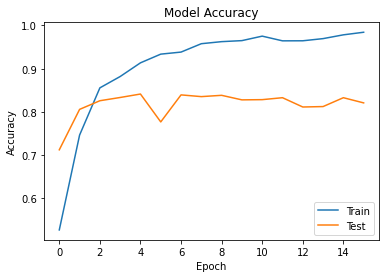

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.legend(['Train', 'Test'], loc='lower right')
plt.show()